#Lab 3

###Yash Bhargava
###B20AI050

##Imports

In [1]:
!pip install geopandas
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 44.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
import geopy
from geopy.geocoders import Nominatim
import geopandas as gpd
import pandas as pd

##Question 1

###India Map

In [14]:
india_map = gpd.read_file(r'./india-polygon.shp')

<AxesSubplot:>

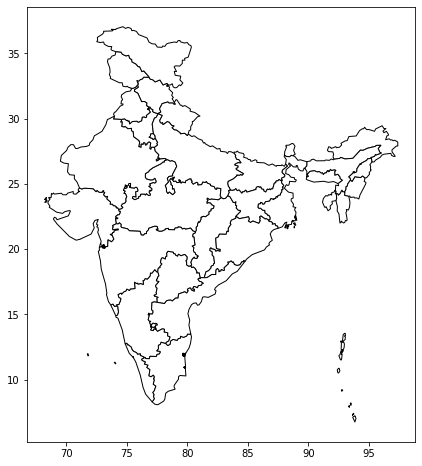

In [15]:
india_map.plot(figsize=(12, 8), color="white", edgecolor="black")

###Importing capital data

Population data source: https://www.findeasy.in/list-of-indian-states-capitals/

In [16]:
pop_data = pd.read_csv("./state_population.csv")
pop_data

,state,capital,population,latitude,longitude
0,Andhra Pradesh,Amaravati,200000,20.9320,77.7523
1,Arunachal Pradesh,Itanagar,80000,27.0844,93.6053
2,Assam,Dispur,500000,26.1433,91.7898
3,Bihar,Patna,2000000,25.5941,85.1376
4,Chhattisgarh,Naya Raipur,1200000,21.1611,81.7864
5,Goa,Panaji,100000,15.4909,73.8278
6,Gujarat,Gandhinagar,225000,23.2156,72.6369
7,Haryana,Chandigarh,1100000,30.7333,76.7794
8,Himachal Pradesh,Shimla,200000,31.1048,77.1734
9,Jharkhand,Ranchi,1400000,23.3441,85.3096


In [17]:
final_df = pd.DataFrame()

In [18]:
for i in range(len(pop_data)):
    # print(pop_data.loc[i]['latitude'])
    row = {
        'state': pop_data['state'][i],
        'capital': pop_data['capital'][i],
        'population': pop_data['population'][i],
        'latitude': pop_data['latitude '][i],
        'longitude': pop_data['longitude'][i]
    }
    temp_row = india_map.loc[row['state'] == india_map['st_nm']]
    row['geometry'] = temp_row['geometry'].values[0]
    # row['latitude'] = temp_row['latitude'][i]
    # row['longitude'] = temp_row['longitude'][i]
    # print(temp_row['geometry'].values)
    # print(row)
    final_df = final_df.append(row, ignore_index=True)

final_df

,state,capital,population,latitude,longitude,geometry
0,Andhra Pradesh,Amaravati,200000.0,20.9320,77.7523,POLYGON ((81.10544615182596 17.823133823951366...
1,Arunachal Pradesh,Itanagar,80000.0,27.0844,93.6053,POLYGON ((95.23643457993093 26.681049602925928...
2,Assam,Dispur,500000.0,26.1433,91.7898,POLYGON ((95.19593819532562 27.036122602604937...
3,Bihar,Patna,2000000.0,25.5941,85.1376,"POLYGON ((88.1135704876876 26.54028101725437, ..."
4,Chhattisgarh,Naya Raipur,1200000.0,21.1611,81.7864,"POLYGON ((83.94694247163117 23.62195914415293,..."
5,Goa,Panaji,100000.0,15.4909,73.8278,"POLYGON ((74.1198198074117 15.652776376209262,..."
6,Gujarat,Gandhinagar,225000.0,23.2156,72.6369,MULTIPOLYGON (((68.3580841977354 23.8047482031...
7,Haryana,Chandigarh,1100000.0,30.7333,76.7794,POLYGON ((77.12555146478286 30.563741339060886...
8,Himachal Pradesh,Shimla,200000.0,31.1048,77.1734,POLYGON ((78.92089118228449 31.254978125418248...
9,Jharkhand,Ranchi,1400000.0,23.3441,85.3096,"POLYGON ((87.79409900913467 25.22083815454184,..."


In [19]:
final_gpd = gpd.GeoDataFrame(final_df, geometry='geometry')

###Visualising bubble chart

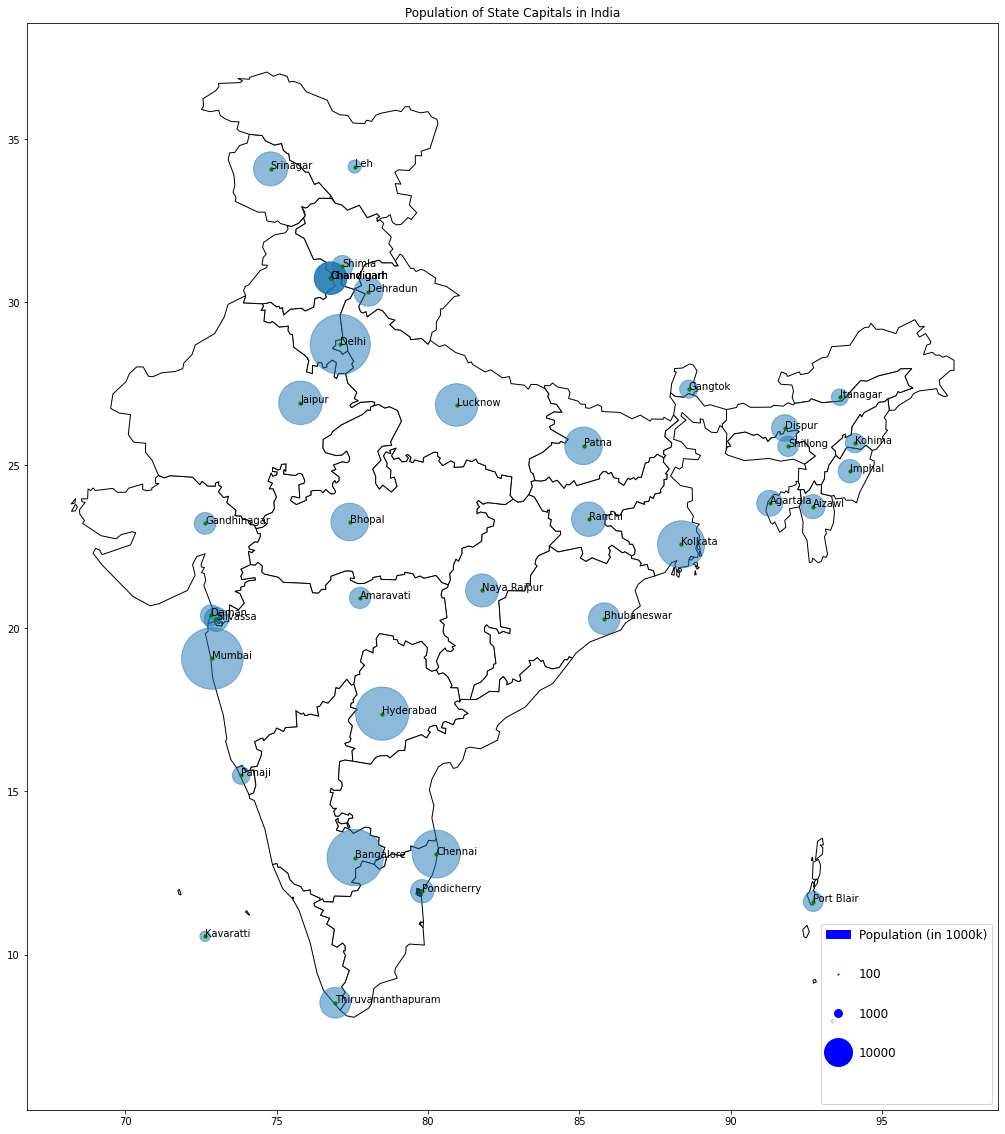

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))

india_map.plot(ax=ax, color="white", edgecolor="black")
ax.scatter(x=final_gpd['longitude'], y=final_gpd['latitude'], s=final_gpd['population'] ** 0.5, alpha=0.5)

for i, name in enumerate(final_gpd['capital']):
    ax.annotate(name, (final_gpd['longitude'][i], final_gpd['latitude'][i]))

ax.scatter(x=final_gpd['longitude'], y=final_gpd['latitude'], s=10, color="green")
ax.set_title("Population of State Capitals in India")

legends = [
    Circle((0, 0), 1, color='blue', label='Population (in 1000k)'),
    Line2D([0], [0], marker='o', color='w', label='100', markerfacecolor='blue', markersize=3),
    Line2D([0], [0], marker='o', color='w', label='1000', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='10000', markerfacecolor='blue', markersize=30),
    Circle((0, 0), 0, color='white', label='')
]

ax.legend(handles=legends, loc='lower right', fontsize=12, labelspacing=2.2)

plt.show()


##Question 2

In [21]:
flight_sc_df = pd.read_csv('./Flight_Schedule_Data.csv')
flight_sc_df

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight No,Effective From,EffectiveTo
0,Abu Dhabi,Ahmedabad,G8 6,23:30,13:20,12:20,Via BOM,"M,W,Th,F,Sa,Su",G8 2504,45024,45025
1,Abu Dhabi,Ahmedabad,G8 6,23:30,13:20,12:20,Via BOM,"W,F,Sa,Su",G8 2504,45026,45029
2,Abu Dhabi,Ahmedabad,G8 6,23:30,08:25,07:25,Via BOM,"Tu,W,F,Sa,Su",G8 365,45026,45029
3,Abu Dhabi,Ahmedabad,G8 6,23:30,08:25,07:25,Via BOM,Daily,G8 365,45030,45032
4,Abu Dhabi,Ahmedabad,G8 6,23:30,13:20,12:20,Via BOM,"M,W,Th,F,Sa,Su",G8 2504,45030,45032
...,...,...,...,...,...,...,...,...,...,...,...
4210,Varanasi,Phuket,G8 350,15:30,11:15,18:15,Via BOM,Daily,G8 21,45044,45045
4211,Varanasi,Phuket,G8 350,15:30,11:15,18:15,Via BOM,"M,W,F,Sa",G8 21,45046,45047
4212,Varanasi,Phuket,G8 408,18:35,13:30,17:25,Via BLR,"M,Tu,W,F,Sa,Su",G8 41,45041,45049
4213,Varanasi,Ranchi,G8 408,19:05,11:25,16:20,Via BLR,Daily,G8 374,45024,45027


In [22]:
flight_sc_df = flight_sc_df[['Origin', 'Destination']]
flight_sc_df

,Origin,Destination
0,Abu Dhabi,Ahmedabad
1,Abu Dhabi,Ahmedabad
2,Abu Dhabi,Ahmedabad
3,Abu Dhabi,Ahmedabad
4,Abu Dhabi,Ahmedabad
...,...,...
4210,Varanasi,Phuket
4211,Varanasi,Phuket
4212,Varanasi,Phuket
4213,Varanasi,Ranchi


In [23]:
flight_sc_df['Origin'].unique()

array(['Abu Dhabi', 'Ahmedabad', 'Amritsar', 'Bagdogra', 'Bangkok',
       'Bengaluru', 'Chandigarh', 'Chennai', 'Dammam', 'Dehra Dun',
       'Delhi', 'Dubai', 'Goa', 'Goa-New Goa', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jammu', 'Jeddah', 'Kannur', 'Kochi', 'Kolkata',
       'Kuwait', 'Leh', 'Lucknow', 'Mumbai', 'Muscat', 'Nagpur', 'Patna',
       'Phuket', 'Port Blair', 'Pune', 'Ranchi', 'Srinagar', 'Thoise',
       'Varanasi'], dtype=object)

Now it contains some cities outside India, but for our visualisation we will only consider the ones inside Inida

In [24]:
indian_cities = {}
flight_df = pd.DataFrame()

geolocator = Nominatim(user_agent='yash', timeout=10)

for city in flight_sc_df['Origin'].unique():
    # print(city)
    location_of_city = geolocator.geocode(str(city))

    if (
        8 <= location_of_city.latitude and location_of_city.latitude <= 38
    ) and (
        68 <= location_of_city.longitude and location_of_city.longitude <= 98
    ):
        indian_cities[city] = location_of_city

indian_cities.keys()

dict_keys(['Ahmedabad', 'Amritsar', 'Bagdogra', 'Bengaluru', 'Chandigarh', 'Chennai', 'Dehra Dun', 'Delhi', 'Goa', 'Goa-New Goa', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jammu', 'Kannur', 'Kochi', 'Kolkata', 'Leh', 'Lucknow', 'Mumbai', 'Nagpur', 'Patna', 'Port Blair', 'Pune', 'Ranchi', 'Srinagar', 'Thoise', 'Varanasi'])

In [25]:
flight_sc_df = flight_sc_df.loc[flight_sc_df['Origin'].isin(indian_cities.keys()) & (flight_sc_df['Destination']).isin(indian_cities.keys())]
flight_sc_df.reset_index(inplace=True, drop=True)
flight_sc_df

,Origin,Destination
0,Ahmedabad,Amritsar
1,Ahmedabad,Amritsar
2,Ahmedabad,Amritsar
3,Ahmedabad,Amritsar
4,Ahmedabad,Amritsar
...,...,...
3230,Varanasi,Patna
3231,Varanasi,Patna
3232,Varanasi,Patna
3233,Varanasi,Ranchi


In [26]:
final_flight_df = flight_sc_df.drop_duplicates()
final_flight_df

,Origin,Destination
0,Ahmedabad,Amritsar
9,Ahmedabad,Bagdogra
22,Ahmedabad,Bengaluru
54,Ahmedabad,Chandigarh
56,Ahmedabad,Chennai
...,...,...
3204,Varanasi,Goa-New Goa
3210,Varanasi,Jaipur
3218,Varanasi,Mumbai
3227,Varanasi,Patna


In [27]:
final_flight_df = pd.merge(final_flight_df, 
               flight_sc_df.groupby(['Origin','Destination']).size().reset_index(name='count'),
               on=['Origin','Destination'],
               how="left").fillna({'count': 0})
final_flight_df

,Origin,Destination,count
0,Ahmedabad,Amritsar,9
1,Ahmedabad,Bagdogra,13
2,Ahmedabad,Bengaluru,32
3,Ahmedabad,Chandigarh,2
4,Ahmedabad,Chennai,15
...,...,...,...
412,Varanasi,Goa-New Goa,6
413,Varanasi,Jaipur,8
414,Varanasi,Mumbai,9
415,Varanasi,Patna,6


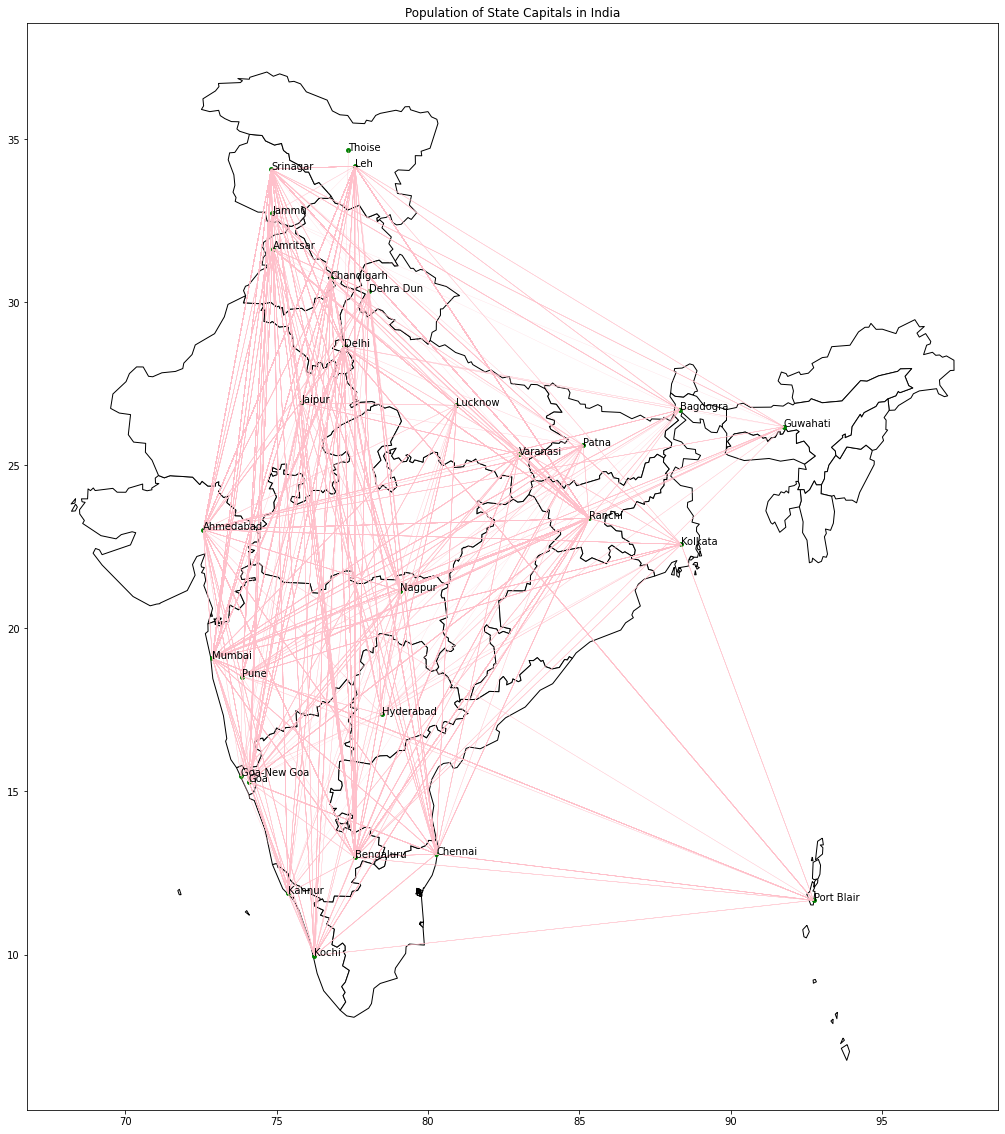

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))

india_map.plot(ax=ax, color="white", edgecolor="black")

airport_longitudes = [x.longitude for x in indian_cities.values()]
airport_latitudes = [x.latitude for x in indian_cities.values()]
ax.scatter(x=airport_longitudes, y=airport_latitudes, s=15, color="green")
for i, name in enumerate(indian_cities.keys()):
    ax.annotate(name, (airport_longitudes[i], airport_latitudes[i]))

for i in range(len(flight_sc_df)):
    plt.plot([indian_cities[flight_sc_df['Origin'][i]].longitude, indian_cities[flight_sc_df['Destination'][i]].longitude],
        [indian_cities[flight_sc_df['Origin'][i]].latitude, indian_cities[flight_sc_df['Destination'][i]].latitude],
        color="pink", linewidth=0.3, alpha=0.6
    )

ax.set_title("Population of State Capitals in India")

plt.show()
